In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [24]:
model = torch.load('../data storage/prm_data_L16_FCNN_Nh80.pth')
model

OrderedDict([('fc1.weight',
              tensor([[ 0.0453, -0.0408,  0.0480,  ..., -0.0531,  0.0135,  0.0201],
                      [-0.1455, -0.1569, -0.0609,  ...,  0.0846, -0.0108, -0.0800],
                      [ 0.0308, -0.1123,  0.0423,  ...,  0.0510,  0.0109, -0.0782],
                      ...,
                      [ 0.0825,  0.1204,  0.1317,  ..., -0.0158, -0.0767, -0.0633],
                      [ 0.0691,  0.0185,  0.0618,  ...,  0.0033,  0.0151,  0.0534],
                      [-0.0285,  0.0662,  0.0123,  ...,  0.1848,  0.0275,  0.0622]])),
             ('fc1.bias',
              tensor([ 0.2500,  0.4044,  0.0296, -0.2837, -0.3209, -0.2250,  0.2278,  0.1125,
                       0.0807, -0.2136,  0.2124, -0.0643, -0.3029, -0.1808, -0.1844,  0.3445,
                      -0.2341, -0.2438, -0.2336, -0.1642, -0.1677,  0.1882, -0.1659,  0.1752,
                      -0.0134,  0.3161,  0.2301,  0.0237, -0.2492, -0.2674, -0.2402,  0.2932,
                       0.2042,  0.19

In [25]:
fc_weight = model['fc2.weight']
fc_weight

tensor([[ 0.3723,  0.0863,  0.1544,  ...,  0.3677,  0.2665,  0.0368],
        [ 0.1619,  0.1392,  0.2739,  ...,  0.1747,  0.1172,  0.1331],
        [ 0.2917,  0.2175,  0.2338,  ...,  0.2083,  0.2541,  0.1265],
        ...,
        [-0.2322, -0.4894, -0.2352,  ..., -0.2889, -0.2870, -0.4086],
        [-0.2932, -0.4257, -0.2700,  ..., -0.3148, -0.2796, -0.4137],
        [-0.1696, -0.4377, -0.2679,  ..., -0.3425, -0.3275, -0.3373]])

In [26]:
fc_weight.size()

torch.Size([20, 80])

In [27]:
# NumPy配列に変換
fc_weight_np = fc_weight.cpu().numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [28]:
fc_weight_np_square

array([[ 0.37228066,  0.16192842,  0.29172745, ..., -0.23220669,
        -0.29322106, -0.16955122],
       [ 0.08631541,  0.13915801,  0.21748531, ..., -0.4894201 ,
        -0.42567995, -0.4376874 ],
       [ 0.15436055,  0.27387735,  0.23375335, ..., -0.23524548,
        -0.2700228 , -0.26787722],
       ...,
       [ 0.36765623,  0.17466407,  0.20826657, ..., -0.28894946,
        -0.31482834, -0.34252602],
       [ 0.26647347,  0.11720595,  0.25410628, ..., -0.28703335,
        -0.2796445 , -0.32745275],
       [ 0.03676141,  0.13307835,  0.12646253, ..., -0.40855956,
        -0.41366497, -0.33732492]], dtype=float32)

In [29]:
fc_weight_np_square.shape

(80, 20)

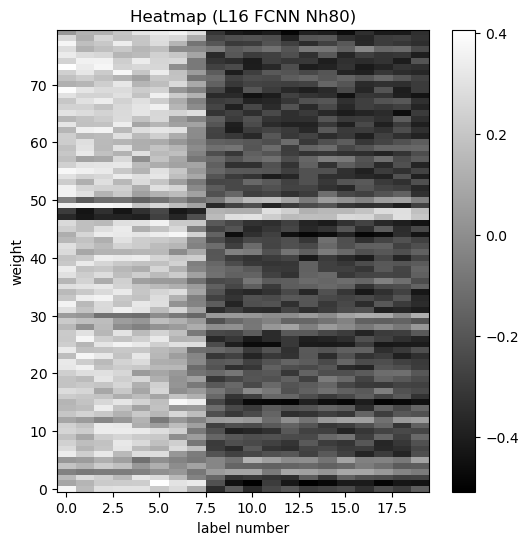

In [30]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', origin='lower', aspect='auto')
plt.colorbar()
plt.title('Heatmap (L16 FCNN Nh80)')


# x軸とy軸に名前を付ける
plt.ylabel('weight')
plt.xlabel('label number')
# 図をファイルとして保存
plt.savefig('../image/L16_FCNN_Nh80_wight.png')
plt.show()

In [31]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([ 17.0766   ,  15.498501 ,  16.481312 ,  16.562637 ,  13.465452 ,
        14.9286175,  10.47609  ,   1.7315159, -15.009941 , -18.744247 ,
       -18.410877 , -17.972794 , -18.748837 , -18.553925 , -17.446445 ,
       -18.633198 , -19.964516 , -18.862993 , -19.847967 , -19.842798 ],
      dtype=float32)

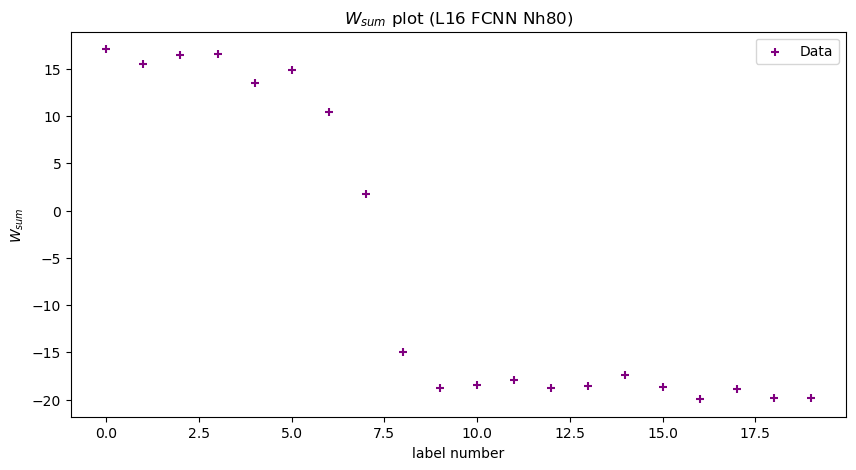

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# # フィッティング用のtanh関数
# def tanh_function(x, a, b, c, d):
#     return a * np.tanh(b * x + c) + d

# データ
x = np.arange(len(fc_weight_np_square_sum))
y = fc_weight_np_square_sum

# # tanh関数の初期推定値
# initial_guess = [1.0, 0.1, 0.0, 0.0]  # パラメータ a, b, c, d の初期推定値

# # tanh関数のパラメータを推定
# params, covariance = curve_fit(tanh_function, x, y, p0=initial_guess)

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple', label='Data')
plt.title('$W_{sum}$ plot (L16 FCNN Nh80)')
plt.xlabel('label number')
plt.ylabel('$W_{sum}$')

# # フィッティング結果をプロットに追加
# x_fit = np.linspace(min(x), max(x), 1000)
# y_fit = tanh_function(x_fit, *params)
# plt.plot(x_fit, y_fit, 'r-', label='Fit', linewidth=2)

plt.legend()
# 図をファイルとして保存
plt.savefig('../image/L16_FCNN_Nh80_weight_sum.png')
plt.show()

# # フィッティングされたパラメータ
# print("Fitted Parameters:")
# print("a:", params[0])
# print("b:", params[1])
# print("c:", params[2])
# print("d:", params[3])


相転移点の算出

In [33]:
# center_x = -params[2] / params[1]
# print("Fitted Center X:", center_x)

# beta = (0.05 * center_x) + 0.2
# print("beta:", beta)